# Nível de escolaridade dos eleitores na Eleição de 2020

### Importação das biblioteas Pandas e Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Seleção das colunas que serão usadas para a análise

In [2]:
colunasSelecionadas = ['HH_GERACAO', 'SG_UF', 'NM_MUNICIPIO', 'CD_MUNICIPIO', 'NR_ZONA',
       'DS_GENERO', 'DS_FAIXA_ETARIA', 'DS_GRAU_ESCOLARIDADE',
       'QT_ELEITORES_PERFIL']

### Leitura do arquivo CSV

In [3]:
dados_2020 = pd.read_csv('Dados/perfil_eleitorado_2020.csv', sep=';', encoding='latin-1', usecols=colunasSelecionadas)

#### Tabela com os dados já lidos e selecionados

In [4]:
dados_2020

,HH_GERACAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,DS_GENERO,DS_FAIXA_ETARIA,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL
0,23:04:11,SP,71072,SÃO PAULO,257,FEMININO,90 a 94 anos,ENSINO MÉDIO COMPLETO,17
1,23:04:11,SP,71072,SÃO PAULO,257,FEMININO,90 a 94 anos,SUPERIOR INCOMPLETO,1
2,23:04:11,SP,71072,SÃO PAULO,257,FEMININO,90 a 94 anos,SUPERIOR COMPLETO,8
3,23:04:11,SP,71072,SÃO PAULO,257,FEMININO,95 a 99 anos,ANALFABETO,28
4,23:04:11,SP,71072,SÃO PAULO,257,FEMININO,95 a 99 anos,LÊ E ESCREVE,149
...,...,...,...,...,...,...,...,...,...
4248089,23:04:11,BA,30791,BURITIRAMA,77,FEMININO,45 a 49 anos,ANALFABETO,26
4248090,23:04:11,BA,30791,BURITIRAMA,77,FEMININO,45 a 49 anos,LÊ E ESCREVE,116
4248091,23:04:11,BA,30791,BURITIRAMA,77,FEMININO,45 a 49 anos,ENSINO FUNDAMENTAL INCOMPLETO,95
4248092,23:04:11,BA,30791,BURITIRAMA,77,FEMININO,45 a 49 anos,ENSINO FUNDAMENTAL COMPLETO,8


### Selecionando o grau de escolaridade do Brasil e das principais cidades do país

In [5]:
# grau de escolaridade do pais e grau de escolaridade das cidades.
# comparamos o grau d escoalridade dos municipios e comparamos com a qunadidde de analfabetos

escolaridade_Brasil_2020 = dados_2020.groupby('DS_GRAU_ESCOLARIDADE').QT_ELEITORES_PERFIL.sum()

escolaridade_SP2020 = dados_2020.query("NM_MUNICIPIO == 'SÃO PAULO'").groupby('DS_GRAU_ESCOLARIDADE').QT_ELEITORES_PERFIL.sum()

escolaridade_RJ2020 = dados_2020.query("NM_MUNICIPIO == 'RIO DE JANEIRO'").groupby('DS_GRAU_ESCOLARIDADE').QT_ELEITORES_PERFIL.sum()

escolaridade_FO2020 = dados_2020.query("NM_MUNICIPIO == 'FORTALEZA'").groupby('DS_GRAU_ESCOLARIDADE').QT_ELEITORES_PERFIL.sum()

escolaridade_BH2020 = dados_2020.query("NM_MUNICIPIO == 'BELO HORIZONTE'").groupby('DS_GRAU_ESCOLARIDADE').QT_ELEITORES_PERFIL.sum()

escolaridade_MA2020 = dados_2020.query("NM_MUNICIPIO == 'MACEIÓ'").groupby('DS_GRAU_ESCOLARIDADE').QT_ELEITORES_PERFIL.sum()

analfabeto_municipios = dados_2020.query("DS_GRAU_ESCOLARIDADE == 'ANALFABETO'").groupby('NM_MUNICIPIO').QT_ELEITORES_PERFIL.sum().sort_values(ascending=False).head()


### Gráfico mostrando o grau de escolaridade dos eleitores no Brasil

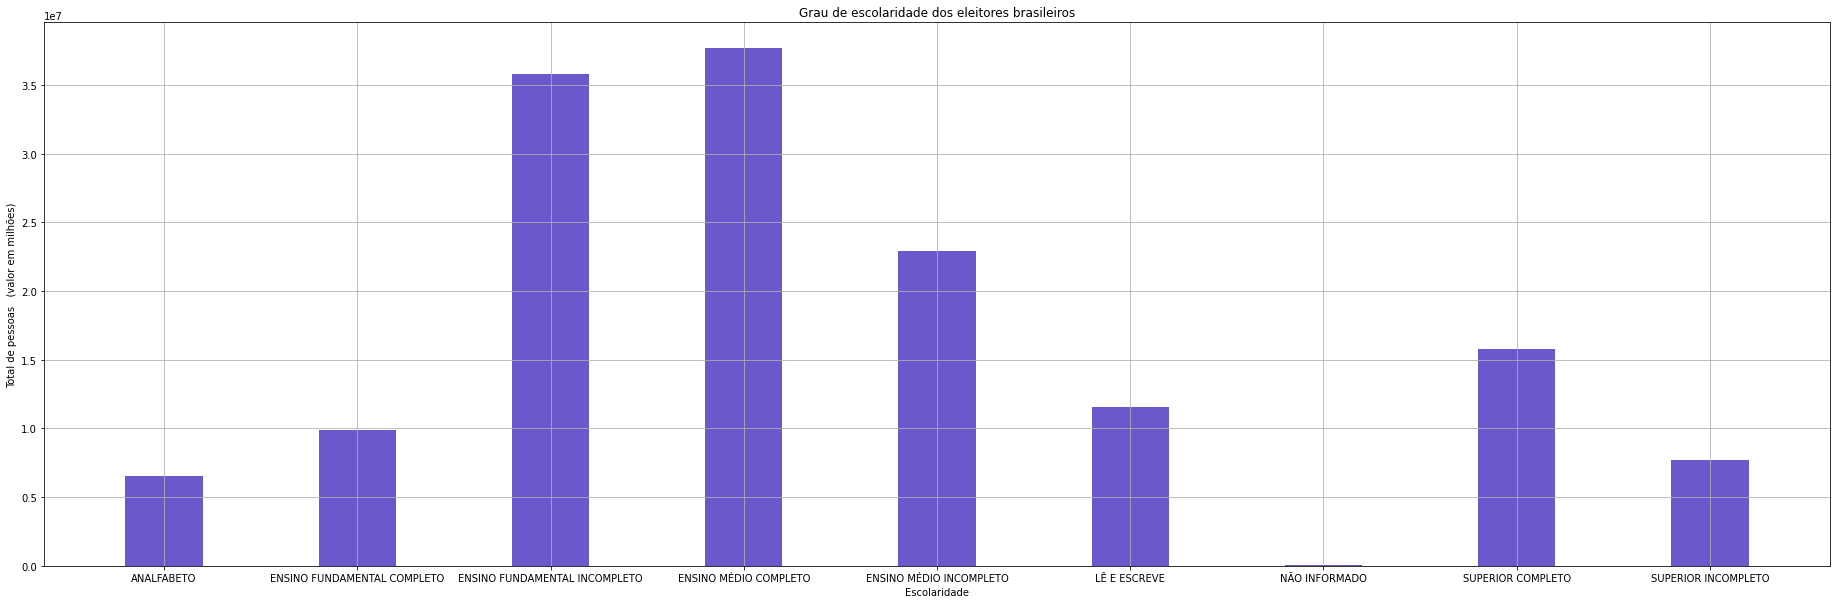

In [13]:
# Grafico mostrando o grua de escolaridade dos eleitores brasileiros
x = escolaridade_Brasil_2020.keys()
y = escolaridade_Brasil_2020.to_list()

plt.title('Grau de escolaridade dos eleitores brasileiros')
plt.xlabel('Escolaridade')
plt.ylabel('Total de pessoas   (valor em milhões)')

plt.bar(x, y, label="2020", color="#6959CD", width=0.4)

plt.rcParams['figure.figsize'] = (30,10)
plt.grid(True)
plt.show()

### Gráfico mostrando os municípios com os maiores índices de eleitores analfabetos
Vale destacar que esse índice é proporcional ao número de habitantes nos múnicípios

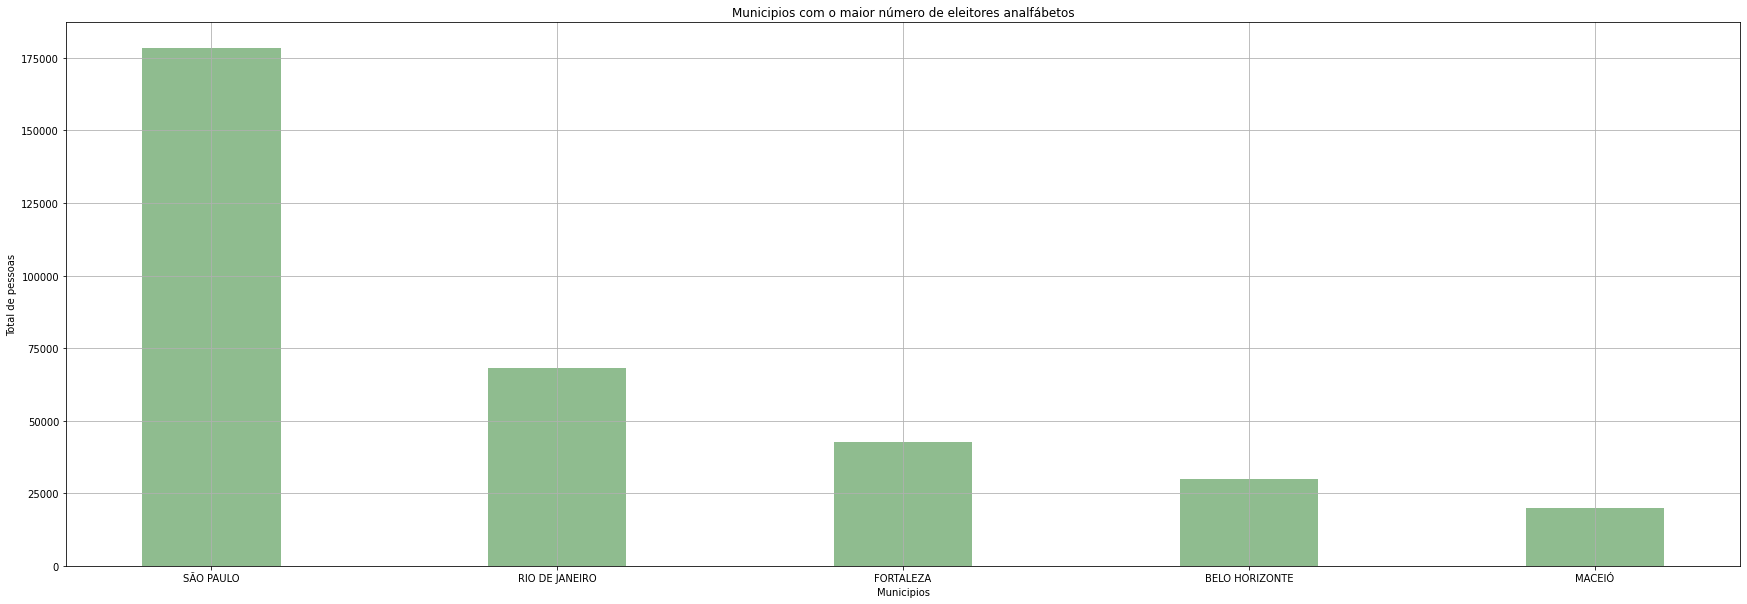

In [7]:
#  qtdd de eleitores analfabetos nos principais municipios
x = analfabeto_municipios.keys()
y = analfabeto_municipios.to_list()

plt.title('Municipios com o maior número de eleitores analfábetos')
plt.xlabel('Municipios')
plt.ylabel('Total de pessoas')

plt.bar(x, y, label="2020", color="#8FBC8F", width=0.4)

plt.rcParams['figure.figsize'] = (30,10)
plt.grid(True)
plt.show()

### Gráfico mostrando o índice de escolaridade dos eleitores na cidade de São Paulo-SP

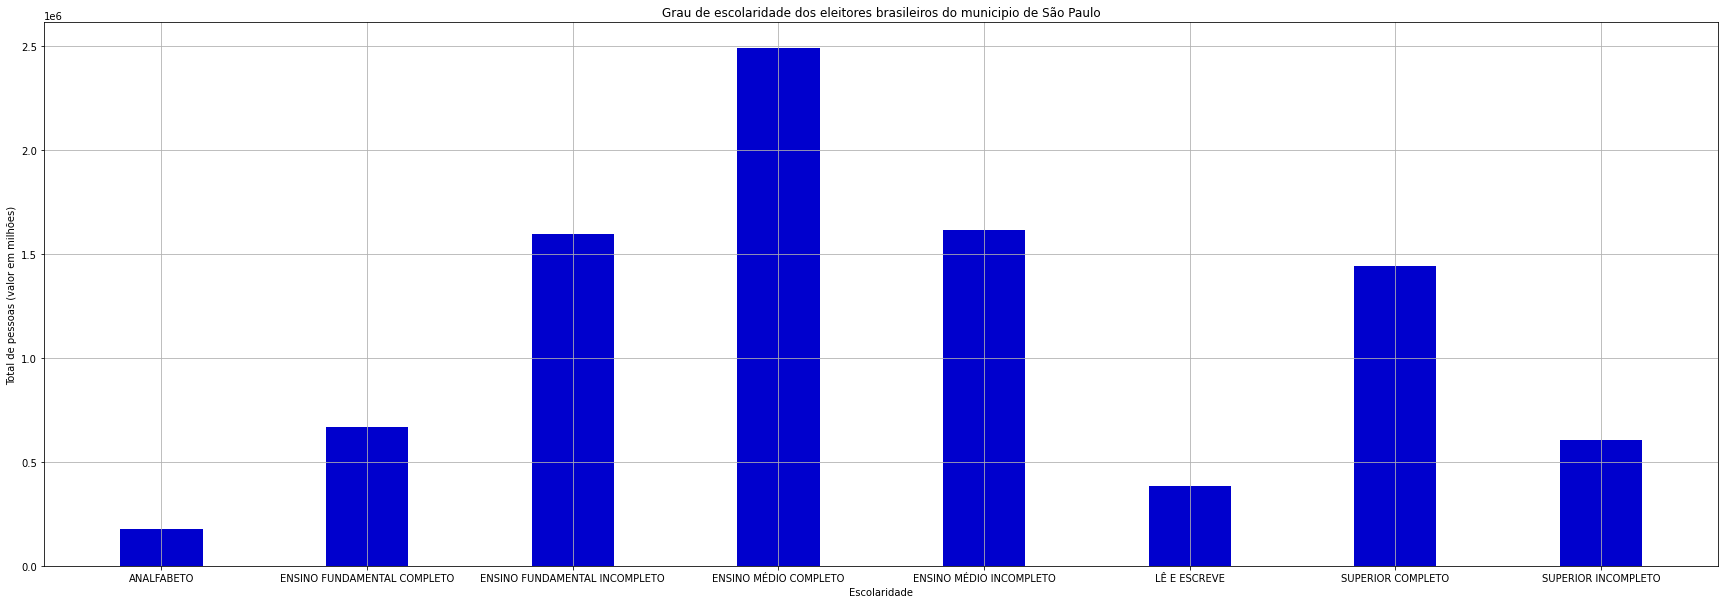

In [8]:
x = escolaridade_SP2020.keys()
y = escolaridade_SP2020.to_list()

plt.title('Grau de escolaridade dos eleitores brasileiros do municipio de São Paulo')
plt.xlabel('Escolaridade')
plt.ylabel('Total de pessoas (valor em milhões)')

plt.bar(x, y, label="2020", color="#0000CD", width=0.4)

plt.rcParams['figure.figsize'] = (30,10)
plt.grid(True)
plt.show()

### Gráfico mostrando o índice de escolaridade dos eleitores na cidade do Rio de Janeiro-RJ

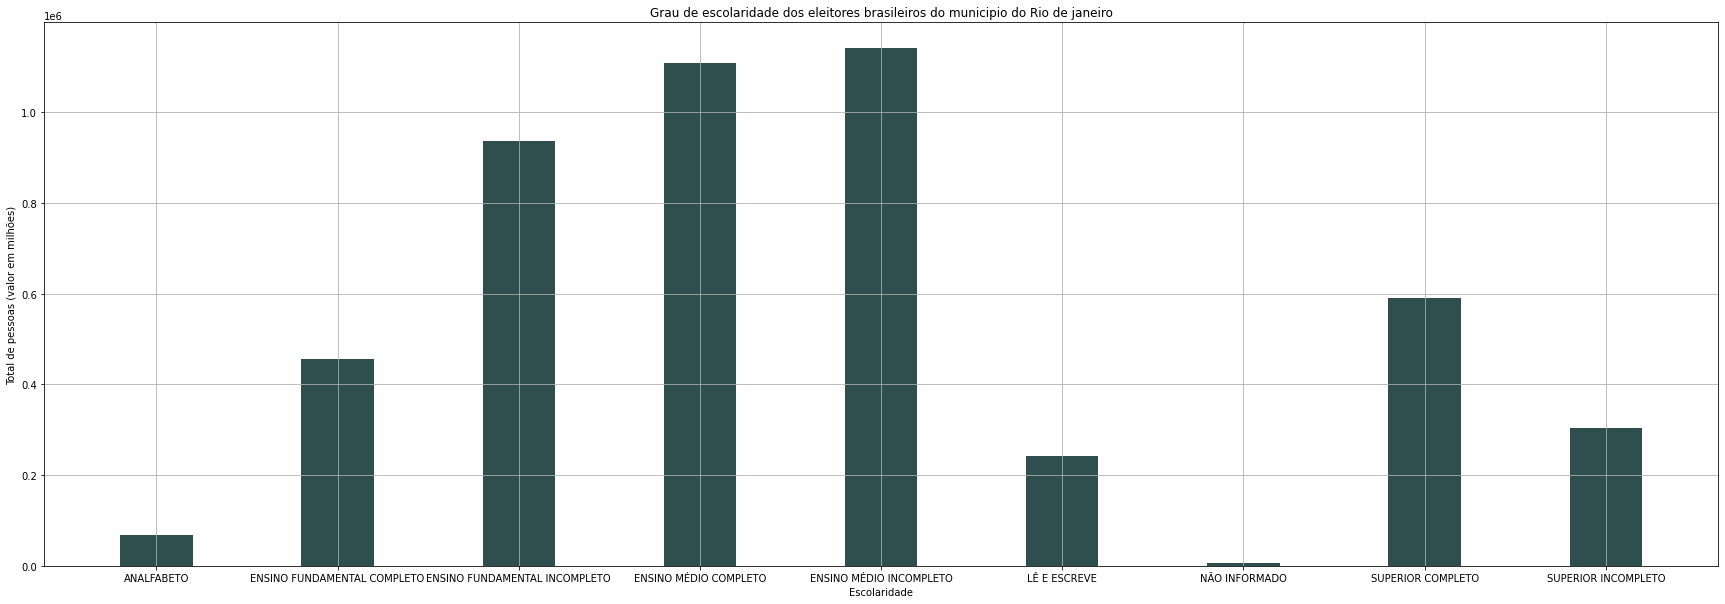

In [9]:
x = escolaridade_RJ2020.keys()
y = escolaridade_RJ2020.to_list()

plt.title('Grau de escolaridade dos eleitores brasileiros do municipio do Rio de janeiro')
plt.xlabel('Escolaridade')
plt.ylabel('Total de pessoas (valor em milhões)')

plt.bar(x, y, label="2020", color="#2F4F4F", width=0.4)

plt.rcParams['figure.figsize'] = (32,10)
plt.grid(True)
plt.show()

### Gráfico mostrando o índice de escolaridade dos eleitores na cidade de Fortaleza-CE

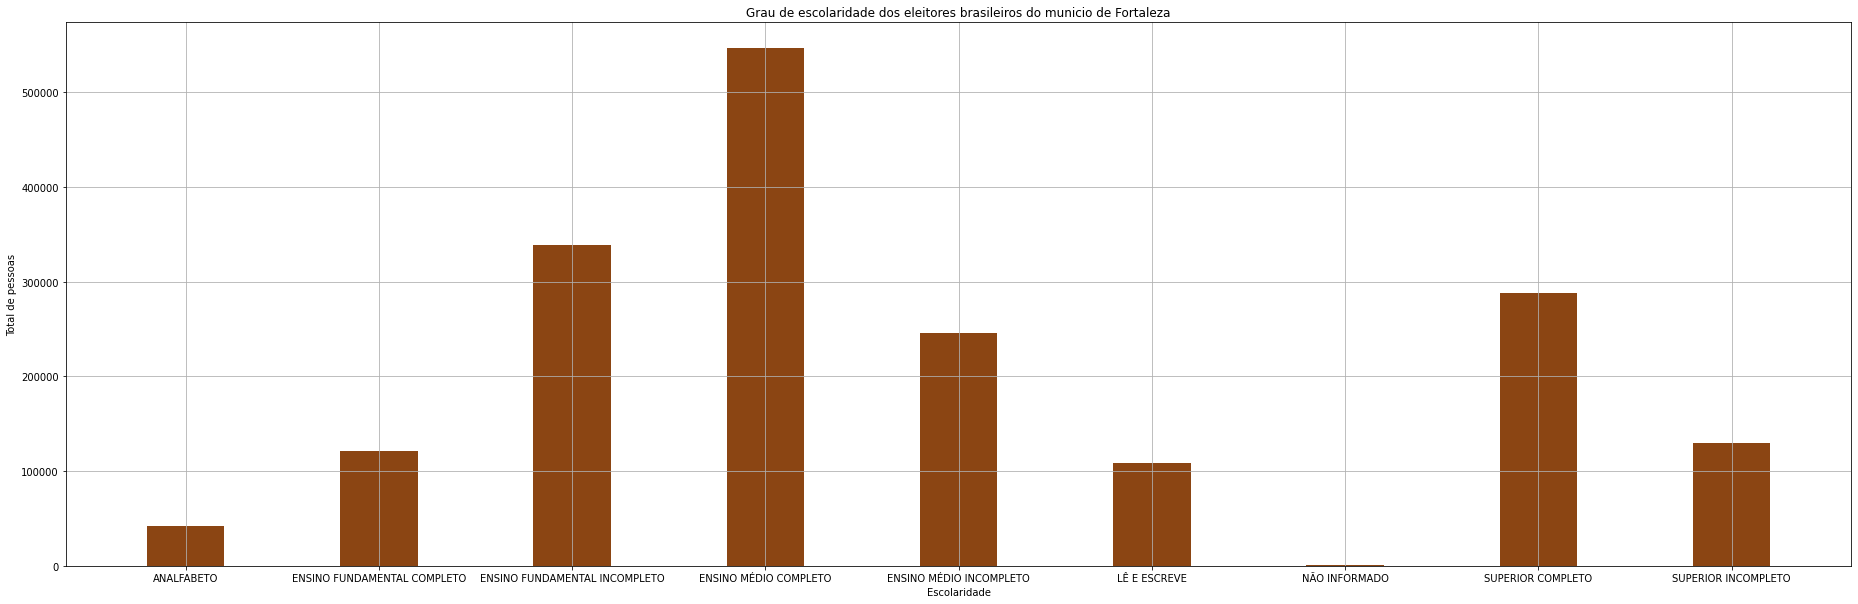

In [10]:
x = escolaridade_FO2020.keys()
y = escolaridade_FO2020.to_list()

plt.title('Grau de escolaridade dos eleitores brasileiros do municio de Fortaleza')
plt.xlabel('Escolaridade')
plt.ylabel('Total de pessoas')

plt.bar(x, y, label="2020", color="#8B4513", width=0.4)

plt.rcParams['figure.figsize'] = (32,10)
plt.grid(True)
plt.show()

### Gráfico mostrando o índice de escolaridade dos eleitores na cidade de Belo Horizonte-MG

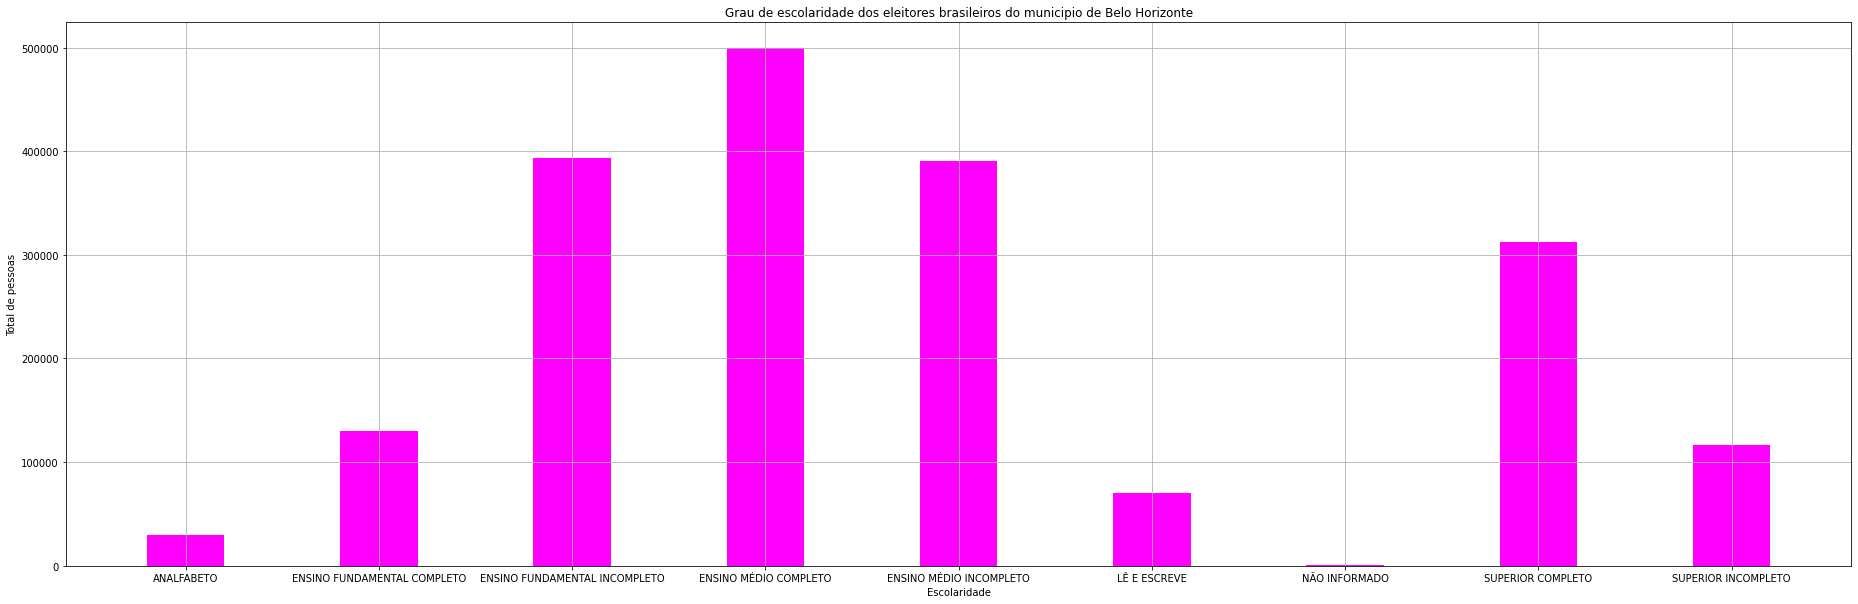

In [11]:
x = escolaridade_BH2020.keys()
y = escolaridade_BH2020.to_list()

plt.title('Grau de escolaridade dos eleitores brasileiros do municipio de Belo Horizonte')
plt.xlabel('Escolaridade')
plt.ylabel('Total de pessoas')

plt.bar(x, y, label="2020", color="#FF00FF", width=0.4)

plt.rcParams['figure.figsize'] = (32,10)
plt.grid(True)
plt.show()

### Gráfico mostrando o índice de escolaridade dos eleitores na cidade de Maceió-AL

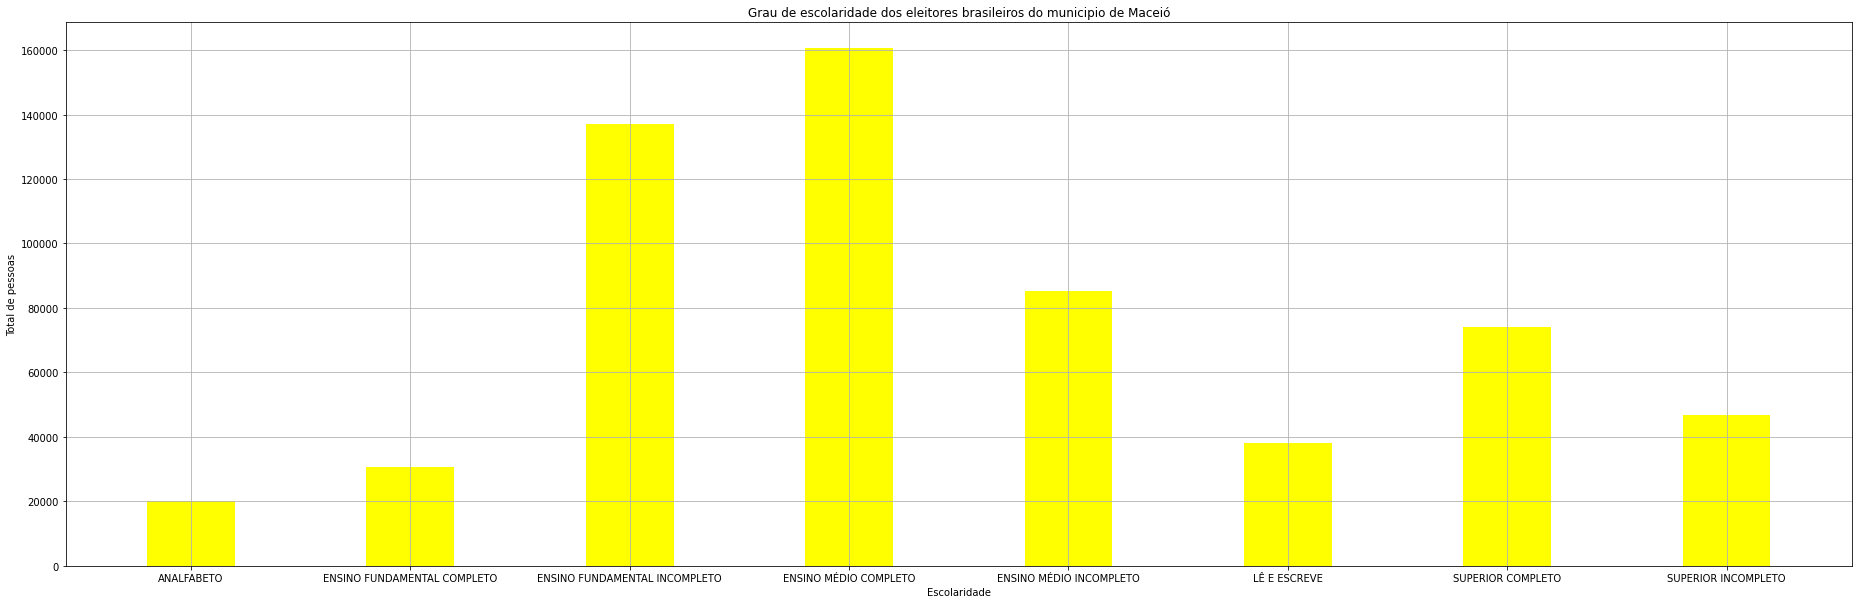

In [12]:
x = escolaridade_MA2020.keys()
y = escolaridade_MA2020.to_list()

plt.title('Grau de escolaridade dos eleitores brasileiros do municipio de Maceió')
plt.xlabel('Escolaridade')
plt.ylabel('Total de pessoas')

plt.bar(x, y, label="2020", color="#FFFF00", width=0.4)

plt.rcParams['figure.figsize'] = (32,10)
plt.grid(True)
plt.show()